In [8]:
import numpy as np

data = np.loadtxt(fname='./linear_data.csv', delimiter='\t')

# standardization
data -= data.mean(axis=0)
data /= data.std(axis=0)

x = data[:, :-1]
y = data[:, -1]

x.shape, y.shape

((1503, 5), (1503,))

In [36]:
N, M = x.shape

w = np.ones(M)
b = 0

In [37]:
def predict(x):
    return w.dot(x) + b

In [38]:
predict(x[0])

0.6590042695516543

In [39]:
def get_loss(x, y):
    pred = predict(x)
    loss = (pred - y) ** 2
    return loss

get_loss(x[0], y[0])

0.21258140154187277

In [40]:
def get_gradient(x, y):
    global w
    global b
    
    eps = 1e-3
    
    loss_before = get_loss(x, y)
    gradient_w = np.empty(M)
    
    for i in range(M):
        w[i] += eps
        loss_after = get_loss(x, y)
        w[i] -= eps
        gradient_w[i] = (loss_after - loss_before) / eps
        
    b += eps
    loss_after = get_loss(x, y)
    b -= eps
    gradient_b = (loss_after - loss_before) / eps
    
    return gradient_w, gradient_b

get_gradient(x[0], y[0])

(array([-0.61003339, -1.05581946,  1.66242713,  1.21242212, -0.59417855]),
 0.9231310135582593)

In [47]:
def total_loss():
    loss = 0
    for i in range(N):
        loss += get_loss(x[i], y[i])
    return loss

total_loss()

738.5213345286867

In [48]:
plt_x = []
plt_y = []

for epoch in range(2500):
    i = np.random.randint(N)
    gradient_w, gradient_b = get_gradient(x[i], y[i])
    w -= gradient_w * 1e-3
    b -= gradient_b * 1e-3
    
    plt_x.append(epoch)
    plt_y.append(total_loss())
    
    if epoch % 150 == 0:
        print(epoch, total_loss())

0 738.2280120457583
150 752.376211685588
300 748.4726412633147
450 743.8043435677652
600 743.5051994114813
750 750.8588195517501
900 737.7673587018091
1050 735.145491873175
1200 736.1835165385183
1350 735.7396019066956
1500 735.3194114486311
1650 732.8293894854384
1800 732.4615425265174
1950 731.9299434452689
2100 732.3727827096633
2250 733.4057950476046
2400 737.4084433561584


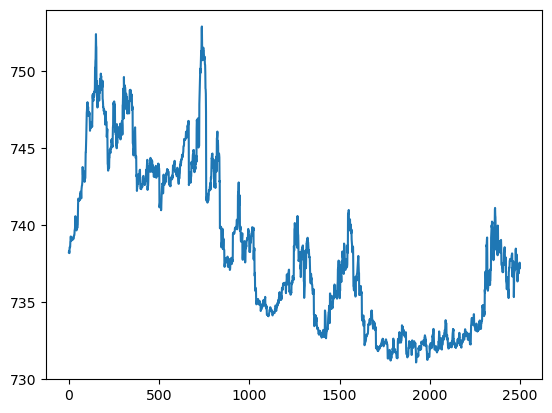

In [49]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(plt_x, plt_y)
plt.show()